In [1]:
### Sri Balaji Muruganandam
### AAAMLP Book - Cross Validation chapter (Abhishek Thagur Book)
### K means Clustering and Validation
### Notebook - 2

In [51]:
"""
References
https://archive.ics.uci.edu/ml/datasets/wine+quality
https://opendatascience.com/transforming-skewed-data-for-machine-learning/ -- Skewed data

"""

'\nReferences\nhttps://archive.ics.uci.edu/ml/datasets/wine+quality\nhttps://opendatascience.com/transforming-skewed-data-for-machine-learning/ -- Skewed data\n\n'

In [3]:
"""
cross-validation is a step in the process of building a machine learning model which
helps us ensure that our models fit the data accurately and also ensures that we do
not overfit.
"""

'\ncross-validation is a step in the process of building a machine learning model which\nhelps us ensure that our models fit the data accurately and also ensures that we do\nnot overfit.\n'

In [4]:
import numpy as np
import pandas as pd
import os
import inspect

In [5]:
### Taking the absolute path of input file
#dirname = os.path.dirname(__file__)
#input_file = os.path.join(dirname,"winequality-red.csv")

In [6]:
### To explain overfitting we are going to take red wine quality dataset
df = pd.read_csv("winequality-red.csv",sep=";",encoding="utf-8")

In [7]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.shape

(1599, 12)

In [11]:
## we need to find the quality of the wine based on other features
## if you see the values of quality column(our label) it is from 0 to 10

In [12]:
df.quality.to_numpy()[0:100]

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6])

In [13]:
## So we can take this problem as classification or regression.
## But we are taking it as a classification problem. Class 0 to 10
## Checking the unique quality classes

#df.quality.unique()
np.unique(df.quality.to_numpy())

array([3, 4, 5, 6, 7, 8])

In [14]:
pd.DataFrame(np.unique(df.quality.to_numpy(),return_counts=True))

,0,1,2,3,4,5
0,3,4,5,6,7,8
1,10,53,681,638,199,18


In [15]:
## The quality classes are mostly 5 and 6. The range is actually between 3 and 8
## So, we are mapping these classes as 0 to 5 from 3 to 8

map_values = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

df.quality = df.quality.map(map_values)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [16]:
df.quality.unique()

array([2, 3, 4, 1, 5, 0])

In [17]:
"""
When we look into the lables we can understand it is a classification problem. Generally this problem is 
solved with neural networks. We may have lot of classification algorithms in our head. 

Here, we are starting with decision tree model that we can visualize too
"""

'\nWhen we look into the lables we can understand it is a classification problem. Generally this problem is \nsolved with neural networks. We may have lot of classification algorithms in our head. \n\nHere, we are starting with decision tree model that we can visualize too\n'

In [18]:
### Just remember, we are doing this to understand what overfitting is
### Dividing the data into train and test data.
df.shape

(1599, 12)

In [19]:
### Shuffling the dataset
df.sample(frac=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1524,6.0,0.420,0.19,2.0,0.075,22.0,47.0,0.99522,3.39,0.78,10.0,3
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,2
1556,6.6,0.880,0.04,2.2,0.066,12.0,20.0,0.99636,3.53,0.56,9.9,2
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,3
937,12.0,0.630,0.50,1.4,0.071,6.0,26.0,0.99791,3.07,0.60,10.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
948,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,4
1017,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,3
958,6.4,0.570,0.12,2.3,0.120,25.0,36.0,0.99519,3.47,0.71,11.3,4
72,7.7,0.690,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.5,2


In [20]:
### Resetting the index after shuffling
df = df.sample(frac=1).reset_index(drop=True)
train_data = df.head(1000)
test_data = df.tail(599)

In [21]:
### Modelling a decision tree
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
model = tree.DecisionTreeClassifier(max_depth=3, random_state=23)      ## Note Decision tree can be used for both classification and Regression

In [23]:
## Selecting all the columns except quality for X
columns = list(df.columns)
columns.remove("quality")

In [24]:
model.fit(train_data[columns],train_data.quality)

DecisionTreeClassifier(max_depth=3, random_state=23)

In [25]:
## We kept the max depth to 3 and keeping all other parameters as default
## Predicting
predict_train = model.predict(train_data[columns])
predict_test = model.predict(test_data[columns])

In [26]:
### Calculate the accuracy of train data
train_acc = metrics.accuracy_score(train_data.quality, predict_train)
train_acc

0.594

In [27]:
### Calculate the accuracy of test data
test_acc = metrics.accuracy_score(test_data.quality, predict_test)
test_acc

0.5475792988313857

In [28]:
### We can also use other metrics to calculate accuracy. We have used the basic one.
"""
Now, Experiementing with various depth values and plotting the accuracy for test and train data
"""

train_ls, test_ls = [],[]

for depth in range(1,30):
    model = tree.DecisionTreeClassifier(max_depth=depth, random_state=23)
    model.fit(train_data[columns],train_data.quality)
    
    predict_train = model.predict(train_data[columns])
    predict_test = model.predict(test_data[columns])
    
    train_acc = metrics.accuracy_score(train_data.quality, predict_train)
    test_acc = metrics.accuracy_score(test_data.quality, predict_test)

    
    train_ls.append(round(train_acc,3))
    test_ls.append(round(test_acc,3))

print("Training Acc", train_ls)

Training Acc [0.554, 0.563, 0.594, 0.647, 0.684, 0.734, 0.781, 0.831, 0.875, 0.906, 0.932, 0.947, 0.967, 0.984, 0.993, 0.999, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [29]:
### Plotting both training and testing accuracy
### Setting label size
matplotlib.rc("xtick", labelsize = 20)
matplotlib.rc("ytick", labelsize = 20)

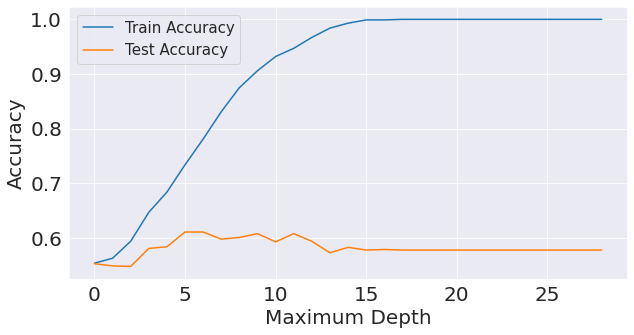

In [30]:
## Model Accuracy

plt.figure(figsize = (10,5))
sns.set_style("darkgrid")
plt.plot(train_ls, label = "Train Accuracy")
plt.plot(test_ls, label = "Test Accuracy")
plt.legend(loc="upper left", prop = {"size":15})
plt.xticks(range(0,30,5))
plt.xlabel("Maximum Depth", size = 20)
plt.ylabel("Accuracy", size = 20)
plt.show()

In [31]:

"""
Train accuracy increases gradually as maximum depth increases. Test accuracy stays the same ---> Overfitting
"""

'\nTrain accuracy increases gradually as maximum depth increases. Test accuracy stays the same ---> Overfitting\n'

In [33]:
### Performing K fold cross validation
### Just an example with the sample data

from sklearn import model_selection

In [50]:
## taking the input data
input_data = train_data

## We can create a new column called kfold and fill it with -1
input_data["kfold"] = -1

## Randomizing the rows - frac = 1(100%) of data
data = input_data.sample(frac=1).reset_index(drop=True)

## initiate the kfold class from model_selection module
k_fold = model_selection.KFold(n_splits=5)

## We are filling values in the newly created kfold column in the data
for fold, (trn_, val_) in enumerate(k_fold.split(X=data)):
    data.loc[val_,"kfold"] = fold

data.sample(10)

/home/sribalaji21/Downloads/ENTER/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
427,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,3,2
456,9.4,0.24,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.200000,3,2
585,10.0,0.59,0.31,2.2,0.090,26.0,62.0,0.99940,3.18,0.63,10.200000,3,2
629,7.7,0.54,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.700000,2,3
1,7.5,0.41,0.15,3.7,0.104,29.0,94.0,0.99786,3.14,0.58,9.100000,2,0
179,8.0,0.50,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.700000,3,0
614,7.0,0.50,0.14,1.8,0.078,10.0,23.0,0.99636,3.53,0.61,10.400000,2,3
577,9.1,0.30,0.34,2.0,0.064,12.0,25.0,0.99516,3.26,0.84,11.700000,4,2
7,7.0,0.64,0.02,2.1,0.067,9.0,23.0,0.99700,3.47,0.67,9.400000,3,0
995,8.7,0.41,0.41,6.2,0.078,25.0,42.0,0.99530,3.24,0.77,12.600000,4,4


In [54]:
### For skewed data we need to use stratified k fold validation instead of k fold validation
### Just an example with the sample data

## taking the input data
input_data2 = train_data

## We can create a new column called kfold and fill it with -1
input_data2["kfold"] = -1

## Randomizing the rows - frac = 1(100%) of data
data2 = input_data2.sample(frac=1).reset_index(drop=True)

## initiate the stratified kfold class from model_selection module
k_fold2 = model_selection.StratifiedKFold(n_splits=5)

## We are filling values in the newly created kfold column in the data
for fold, (trn_, val_) in enumerate(k_fold2.split(X=data2[columns], y =data2.quality)):
    data2.loc[val_,"kfold"] = fold

data2.sample(10)

/home/sribalaji21/Downloads/ENTER/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
440,10.0,0.350,0.45,2.5,0.092,20.0,88.0,0.99918,3.15,0.43,9.4,2,2
411,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,0,1
517,8.2,0.510,0.24,2.0,0.079,16.0,86.0,0.99764,3.34,0.64,9.5,3,2
381,6.2,0.440,0.39,2.5,0.077,6.0,14.0,0.99555,3.51,0.69,11.0,3,1
208,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,2,0
626,9.5,0.780,0.22,1.9,0.077,6.0,32.0,0.99880,3.26,0.56,10.6,3,3
614,7.6,0.420,0.08,2.7,0.084,15.0,48.0,0.99680,3.21,0.59,10.0,2,3
123,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,4,0
279,7.4,0.360,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,5,0
427,6.2,0.510,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5,3,2


Text(0, 0.5, 'Count')

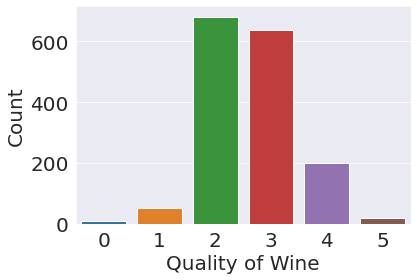

In [55]:
### Now analysing the wine data to check if the labels are skewed

### Visualizing the distribution of the data
b = sns.countplot(x="quality", data = df)
b.set_xlabel("Quality of Wine",fontsize=20)
b.set_ylabel("Count",fontsize=20)

In [56]:
### The label(quality) is very much skewed
### Here 2 and 3 classes have a lot of samples where others don't have many
### If we use kfold we won't have an equal distribution of targets in every fold. So we choose stratified k fold

"""
Rule: If it is a standard classification problem choose stratifies kfold blindly
"""


'\nRule: If it is a standard classification problem choose stratifies kfold blindly\n'

In [57]:
### For very large dataset ---> Use hold-out based validation
### If we have a million record -- split into 900k for training and keep 100k for testing(We calculate all loss,accuracy,other metrics)
### For small dataset k fold and strified always works
### for very small dataset use k = N(no of samples in the dat)

In [62]:
### For regression all cross validation methods works but only in stratified we have to make slight modification
"""
Stratified kfold for regression - We have to convert labels into bins
"""
### We can also use Sturge's Rule to bin the labels

from sklearn import datasets

### creating a function

def create_folds(data):
    ## We can create a new column called kfold and fill it with -1
    data["kfold"] = -1

    ## Randomizing the rows - frac = 1(100%) of data
    data = data.sample(frac=1).reset_index(drop=True)
    
    ## Using Sturge's rule to caluculate the bins
    num_bins = int(np.floor(1+np.log2(len(data))))
    
    ## Bin the lables(targets)
    data.loc[:,"bins"] = pd.cut(data["label"],bins=num_bins, labels=False)
    
    ## initiate the stratified kfold class from model_selection module
    k_fold = model_selection.StratifiedKFold(n_splits=5)

    ## We are filling values in the newly created kfold column in the data
    for fold, (trn_, val_) in enumerate(k_fold.split(X=data, y =data.bins.values)):
        data.loc[val_,"kfold"] = fold

    ## Drop the bins column
    data = data.drop("bins",axis=1)
    
    ### return the dataframes with folds
    return data


In [66]:
### Creating dataset with 15000 samples, 100 features and 1 target
X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)

## Converting numpy array to dataframe - X
df = pd.DataFrame(data=X, columns=[f"Col_{i}" for i in range(X.shape[1])])

### Adding target as another column
df.loc[:,"label"] = y

### create folds
df_fold = create_folds(df)

df_fold.sample(10)

/home/sribalaji21/Downloads/ENTER/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_92,Col_93,Col_94,Col_95,Col_96,Col_97,Col_98,Col_99,label,kfold
9373,0.384812,0.319378,0.380814,-0.369946,-0.646010,-1.170233,1.365656,0.203105,-0.744061,0.399682,...,-1.261208,0.948303,1.390754,1.881341,0.536872,-0.388648,-1.444807,0.652274,-400.269492,2
6364,0.332920,0.164306,0.188565,0.218178,1.430915,-1.158045,-0.507621,-1.760007,-1.957167,-1.182007,...,-0.624055,-1.430586,-1.266753,0.299245,0.041193,-0.031974,1.706517,0.243394,135.630951,2
4131,-0.046925,-1.077549,0.544803,-0.146079,-0.284955,-0.446345,0.979194,-0.849175,0.338864,-1.616546,...,0.491513,-0.220278,0.206065,0.813179,-0.913056,-0.195446,-0.762650,1.085532,-36.608662,1
13970,-1.276619,1.165776,-1.354538,-1.512270,-0.869267,-0.591080,0.192465,0.338300,-0.856677,-0.601489,...,-0.183971,-0.505884,-0.087731,0.338083,-1.171971,-0.056475,0.280795,0.417972,174.020960,4
10282,0.645443,-0.647820,0.923528,-0.663199,-0.632219,-0.186385,-0.505173,-0.288278,0.651618,0.398297,...,-1.396328,-0.003180,1.367077,-0.715188,-1.923876,0.131512,-1.258255,-0.346912,-178.088457,3
13623,0.539327,-0.375651,0.883687,0.218064,1.000948,-0.058304,0.244067,0.157450,1.077872,1.569601,...,-0.471037,-0.019477,0.293458,-1.719162,1.040298,-0.437075,0.759836,-0.900995,250.671557,4
12468,-1.380204,-2.485163,-0.166357,-0.336222,-1.238145,0.252164,0.393574,-0.688904,0.871230,-0.179334,...,-0.384496,-0.780643,0.308551,0.602444,0.076469,-0.105414,-0.614840,0.545919,-374.577049,4
1112,-0.717053,-1.913615,0.554918,-2.423322,-1.823874,2.062022,-1.440338,-1.588908,1.251071,1.138166,...,0.433657,-1.004630,0.318220,-0.537709,-0.964633,-0.273606,0.640185,0.043160,-61.752361,0
14052,1.393274,1.295915,-0.682908,1.406197,-0.023500,-0.070595,0.853446,-0.421934,1.401150,2.065475,...,-0.107356,-0.815919,-0.003341,0.216966,1.261355,-1.575694,-2.533619,0.096092,-459.958538,4
8729,1.489209,-0.357896,0.129892,-1.113019,-1.569788,-0.108492,-0.186464,1.194323,-0.690739,0.503329,...,-1.199034,-1.221683,2.440052,-1.341604,1.877165,0.600670,-0.165742,0.328912,-214.068096,2
